In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
cap= cv2.VideoCapture(0)
#recording part
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0 , (640,480))


while True:
    _,frame = cap.read()
    
    out.write('frame')
    
    cv2.imshow('frame',frame)
    
    k=cv2.waitKey(5) & 0xFF
    if k==27:
        break

cv2.destroyAllWindows()
cap.release()


'''

In [2]:
img = cv2.imread('watch.jpg', cv2.IMREAD_GRAYSCALE)
#IMREAD_COLOR
#IMREAD_UNCHANGED

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.plot([50,100],[80,100],'c',linewidth=5)
plt.show()
'''
cv2.imwrite('watchgray.png',img)

True

In [29]:
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0 , (640,480))

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    out.write(frame)
    cv2.imshow('frame',frame)
    cv2.imshow('gray', gray)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

In [27]:
img = cv2.imread('watch.jpg', cv2.IMREAD_COLOR)
watch_face = img[30:170, 50:180]
img[0:140,0:130]= watch_face
cv2.imshow ('image', img)
#cv2.imshow('watchface', watch_face)
cv2.imwrite('watchface.png',watch_face)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [56]:
img = cv2.imread('bookpage.jpg')
retval, threshold = cv2.threshold(img,12,255,cv2.THRESH_BINARY)

cv2.imshow('original',img)
cv2.imshow('threshold',threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [57]:
grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval2, threshold2 = cv2.threshold(grayscaled,12,255,cv2.THRESH_BINARY)
gaus = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)

cv2.imshow('original',img)
cv2.imshow('threshold',threshold2)
cv2.imshow('gaus',gaus)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([5,85,115])
    upper_red = np.array([125,180,180])
    
    mask= cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame, frame , mask=mask)
    
    kernel = np.ones((15,15), np.float32)/225
    smoothed = cv2.filter2D(res,-1,kernel)
    
    #not really the best 
    
    blur = cv2.GaussianBlur(res,(15,15), 0)
    median= cv2.medianBlur(res,15)
    bilateral = cv2.bilateralFilter(res,15,75,75)
    
    cv2.imshow('frame', frame)
    #cv2.imshow('mask', mask)
    cv2.imshow('res',res)
    #cv2.imshow('smoothed',smoothed)
    #cv2.imshow('blur',blur)
    cv2.imshow('median',median)
    cv2.imshow('bilateral',bilateral)
    
    k= cv2.waitKey(5) & 0xFF
    if k == 27:
        break
        
cv2.destroyAllWindows()
cap.release()

In [47]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([5,90,110])
    upper_red = np.array([120,170,150])
    
    mask= cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame, frame , mask=mask)
    
    kernel = np.ones((5,5), np.uint8)
    erosion = cv2.erode(mask, kernel, iterations = 1)
    dilation = cv2.dilate(mask, kernel, iterations = 1)
    
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # make sure to research tophat and blackhat
    
    cv2.imshow('frame', frame)
    #cv2.imshow('res',res)
    cv2.imshow('erosion',erosion)
    cv2.imshow('dilation',dilation)
    cv2.imshow('opening',opening)
    cv2.imshow('closing',closing)
    
    
    k= cv2.waitKey(5) & 0xFF
    if k == 27:
        break
        
cv2.destroyAllWindows()
cap.release()

In [61]:
cap= cv2.VideoCapture(0)
#recording part
#fourcc = cv2.VideoWriter_fourcc(*'XVID')
#out = cv2.VideoWriter('output.avi',fourcc, 20.0 , (640,480))


while True:
    _,frame = cap.read()
    
    #laplacian = cv2.Laplacian(frame,cv2.CV_64F)
    #sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)
    #sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)
    
    #experiment
    grayscaled = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gaus = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)
    #edges = cv2.Canny(gaus,50,75)
    
    edges = cv2.Canny(frame,100,200)
    
    cv2.imshow('frame',frame)
    #cv2.imshow('laplacian',laplacian)
    #cv2.imshow('sobelx',sobelx)
    #cv2.imshow('sobely',sobely)
    cv2.imshow('gaus',gaus)
    cv2.imshow('edges',edges)
    
    
    k=cv2.waitKey(5) & 0xFF
    if k==27:
        break

cv2.destroyAllWindows()
cap.release()

In [5]:
img_bgr = cv2.imread('opencv-template-matching-python-tutorial.jpg')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

template = cv2.imread('opencv-template-for-matching.jpg',0)
w, h = template.shape[::-1]

res= cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.73
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_bgr, pt, (pt[0]+w, pt[1]+h), (0,255,255),2)
    
cv2.imshow("detected", img_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

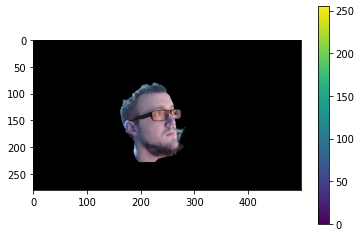

In [7]:
img = cv2.imread("opencv_fore_g.jpg")
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (161,79,150,150)

cv2.grabCut(img,mask,rect, bgdModel,fgdModel,5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)
plt.colorbar()
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
img = cv2.imread('opencv-corner-detection-sample.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv2.goodFeaturesToTrack(gray,100,0.01,10)
corners = np.int0(corners)

for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img, (x,y), 3, 255, -1)

cv2.imshow("corner",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

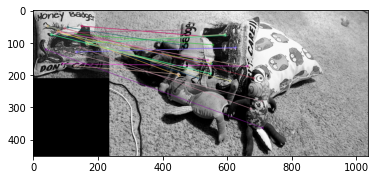

In [2]:
img1 = cv2.imread('opencv-feature-matching-template.jpg',0)
img2 = cv2.imread('opencv-feature-matching-image.jpg',0)

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck= True)

matches = bf.match(des1,des2)
matches = sorted(matches, key=lambda x:x.distance)

img3 = cv2.drawMatches(img1,kp1,img2,kp2, matches[:30],None, flags=2)
plt.imshow(img3)
plt.show()

In [13]:
cap = cv2.VideoCapture('people-walking.mp4')
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
 
    cv2.imshow('fgmask',frame)
    cv2.imshow('frame',fgmask)

    
    k = cv2.waitKey(30) & 0xFF
    if k == 27:
        break
    

cap.release()
cv2.destroyAllWindows()

In [7]:

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

cap= cv2.VideoCapture(0)


while True:
    ret, img = cap.read()
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),((x+w),(y+h)), (255,0,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes= eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
    cv2.imshow("frame", img)
    k = cv2.waitKey(30) & 0xFF
    if k==27:
        break

cap.release()
cv2.destroyAllWindows()